### Data visualization - matplotlib & seaborn
#### https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b
#### https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib
#### https://matplotlib.org/stable/
#### https://seaborn.pydata.org/examples/index.html

In [1]:
# import data from csv
import pandas as pd

austin_weather = pd.read_csv('datasets/austin_weather.csv')
seattle_weather = pd.read_csv('datasets/seattle_weather.csv')

# remap data using dictionary
mths = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12: 'Dec'}
austin_weather["MONTH"] = austin_weather.replace({'DATE':mths})['DATE']
seattle_weather['MONTH'] = seattle_weather.replace({'DATE':mths})['DATE']

#filter values
austin_weather=austin_weather[austin_weather['STATION']=='USW00013904']
seattle_weather=seattle_weather[seattle_weather['STATION']=='USW00094290']

# sort values, ascending in place + add index on DATE
austin_weather.sort_values('DATE', ascending=True, inplace=True)
austin_weather.index=austin_weather['DATE']
seattle_weather.sort_values('DATE', ascending=True, inplace=True)
seattle_weather.index=seattle_weather['DATE']

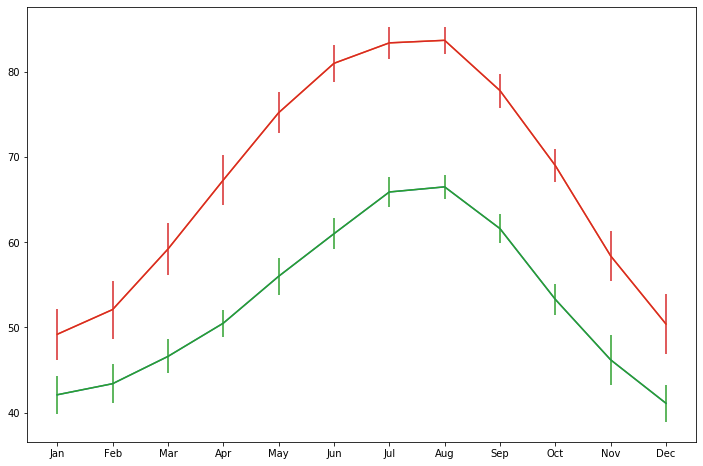

In [3]:
# create figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8)) #change figure size

# add 1st plot - (x,y)
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
# add 2nd plot - (x,y)
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

# add errorbars
ax.errorbar(seattle_weather["MONTH"],            
            seattle_weather["MLY-TAVG-NORMAL"],            
            yerr=seattle_weather["MLY-TAVG-STDDEV"]) #add standard error
ax.errorbar(austin_weather["MONTH"],            
            austin_weather["MLY-TAVG-NORMAL"],            
            yerr=austin_weather["MLY-TAVG-STDDEV"])

plt.show()

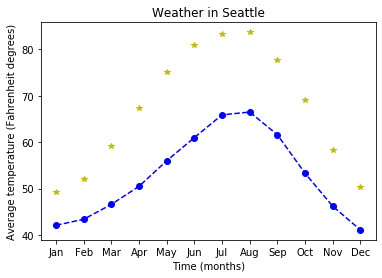

In [82]:
# figure customization

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# add 1st plot - (x,y)
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"]
       , marker='o'
       , linestyle="--"
       , color="b")
# add 2nd plot - (x,y)
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"]
       , marker='*'
       , linestyle="None"
       , color = 'y')

# add xlabel
ax.set_xlabel("Time (months)")

# add ylabel
ax.set_ylabel("Average temperature (Fahrenheit degrees)")

# set title
ax.set_title("Weather in Seattle")

# show figure
plt.show()

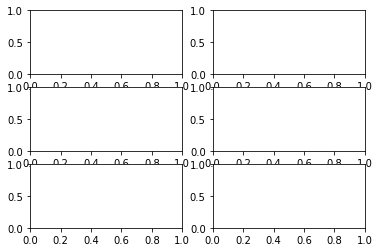

In [83]:
# subplots

fig, ax = plt.subplots(3, 2) #(rows, columns)
plt.show()

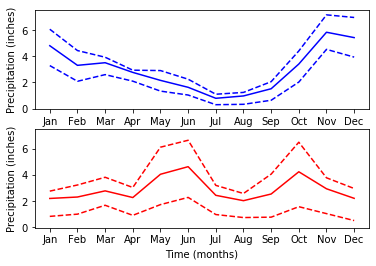

In [90]:
fig, ax = plt.subplots(2, 1,
                       sharey=True) #share y axis range

ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"],            
           color='b')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"],            
           linestyle='--', color='b')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"],
           linestyle='--', color='b')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"],           
           color='r')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"],
           linestyle='--', color='r')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"],            
           linestyle='--', color='r')

ax[0].set_ylabel("Precipitation (inches)")
ax[1].set_ylabel("Precipitation (inches)")
ax[1].set_xlabel("Time (months)")

plt.show()

### Data visualization ctnd. - time series

In [4]:
#read data
import pandas as pd

# Read the data from file using dates as index
climate_change = pd.read_csv('datasets/climate_change.csv', 
                             parse_dates=True, #parse by date (if index is date)
                             index_col='date') #set index

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

plt.show()

D:\Programy\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 1 Axes>

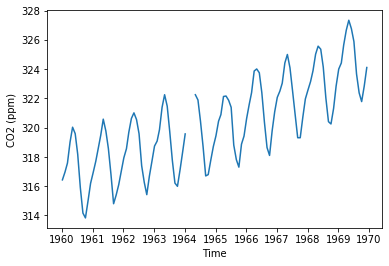

In [3]:
# selecting given decade
sixties = climate_change["1960-01-01":"1969-12-31"]

fig, ax = plt.subplots()
ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

plt.show()

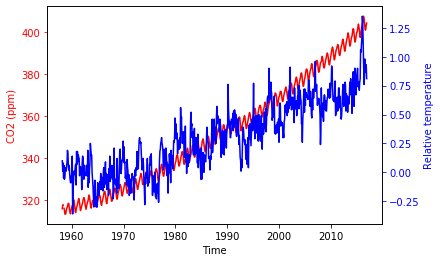

In [4]:
# 2 time series on one plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change["co2"], color='r')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='r')
ax.tick_params('y', colors='r') #coloring ticks

ax2 = ax.twinx() # draw second axis

ax2.plot(climate_change.index, climate_change["relative_temp"], color='b')
ax2.set_ylabel('Relative temperature', color='b')
ax2.tick_params('y', colors='b')

plt.show()

In [10]:
# define function to draw timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):  
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel) 
    axes.set_ylabel(ylabel, color=color)  
    axes.tick_params('y', colors=color)

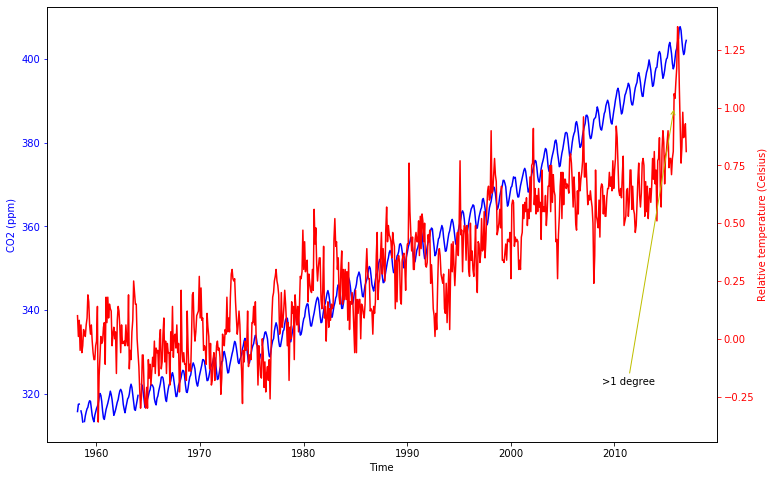

In [37]:
# calling the function + adding annotations
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
fig, ax = plt.subplots(figsize=(12,8))

plot_timeseries(ax,
               climate_change.index,
               climate_change["co2"],
               color='b',
               xlabel='Time',
               ylabel='CO2 (ppm)')

ax2 = ax.twinx()

plot_timeseries(ax2, 
                climate_change.index, 
                climate_change['relative_temp'],
                'red',
                'Time',
                'Relative temperature (Celsius)')

ax2.annotate(">1 degree", 
             xy=(pd.Timestamp('2015-10-06'), 1),             # point to annotate
             xytext=(pd.Timestamp('2008-10-06'), -0.2),      # text coordinates
             arrowprops={'arrowstyle':'->', "color":"y"})    # arrow

plt.show()

### Data visualization ctnd. - bar charts

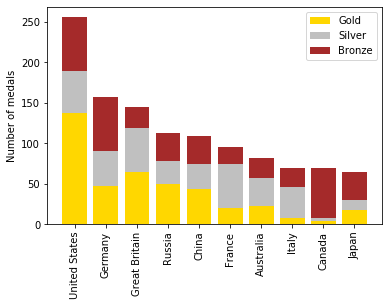

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0) # first column as index

fig, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"], color='gold', label='Gold') # 1st plot, added label

ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], color='silver',
      label='Silver')                         # second series, set which one is on the bottom

ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"],
      color='brown', label='Bronze')          # third series, set bottom as sum of prev 2

ax.set_xticklabels(medals.index, rotation=90) # rotate xticks
ax.set_ylabel("Number of medals")             # set ylabel
ax.legend()                                   # show label

plt.show()

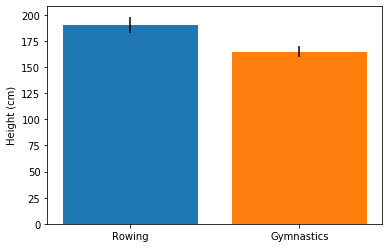

In [76]:
# adding error bars
fig, ax = plt.subplots()
ax.bar("Rowing",       
       mens_rowing["Height"].mean(),       
       yerr=mens_rowing["Height"].std()) # error bar added

ax.bar("Gymnastics",       
       mens_gymnastics["Height"].mean(),       
       yerr=mens_gymnastics["Height"].std())
ax.set_ylabel("Height (cm)")

plt.show()

### Data visualization ctnd. - histograms

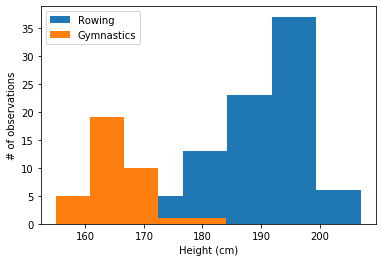

In [73]:
# graph with set bin sizes
import matplotlib.pyplot as plt
import pandas as pd

data_raw = pd.read_csv('datasets/summer2016.csv')
mens_rowing = data_raw[(data_raw['Sex']=='M') & (data_raw['Sport']=='Rowing')]
mens_gymnastic = data_raw[(data_raw['Sex']=='M') & (data_raw['Sport']=='Gymnastics')]

fig, ax = plt.subplots()

ax.hist(mens_rowing["Height"], 
        label="Rowing", bins=5)

ax.hist(mens_gymnastic["Height"], 
        label="Gymnastics", bins=5)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend() # set legend

plt.show()

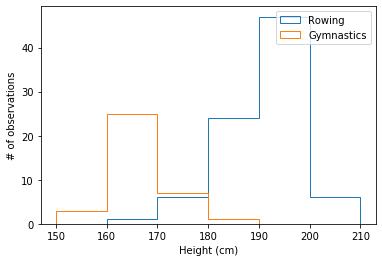

In [75]:
# graph with bin boundaries
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()

ax.hist(mens_rowing["Height"], 
        label="Rowing", 
        bins=[150, 160, 170, 180, 190, 200, 210],
        histtype="step") # set transparency
ax.hist(mens_gymnastic["Height"], 
        label="Gymnastics", 
        bins=[150, 160, 170, 180, 190, 200, 210],
        histtype="step")
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend() # set legend

plt.show()

### Data visualization ctnd. - box plots

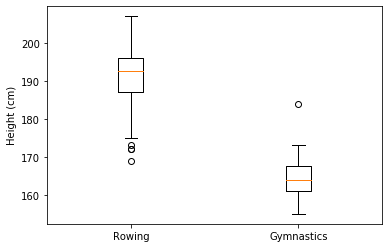

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()

ax.boxplot([mens_rowing["Height"],            
            mens_gymnastics["Height"]])
ax.set_xticklabels(["Rowing", "Gymnastics"])
ax.set_ylabel("Height (cm)")

plt.show()

### Data visualization ctnd. - scatter plots

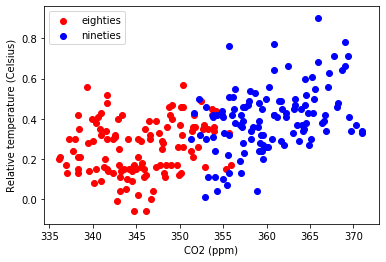

In [85]:
# encoding 2 samples by color
import matplotlib.pyplot as plt
import pandas as pd

# select subsets
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()
ax.scatter(eighties["co2"], eighties["relative_temp"],           
           color="red", label="eighties")

ax.scatter(nineties["co2"], nineties["relative_temp"],           
           color="blue", label="nineties")
ax.legend()
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()

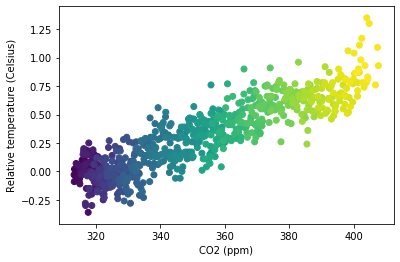

In [88]:
# adding hue i.e. based on index
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"],           
           c=climate_change.index) # select color as hue based on index/time

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

### Data visualization ctnd. - sharing the plot

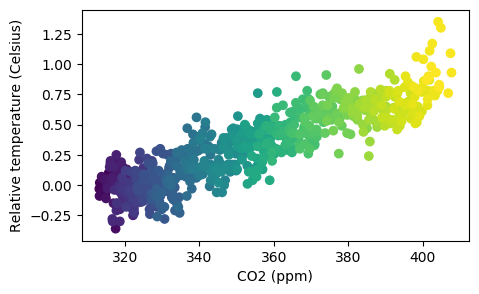

In [31]:
# changing default style
# saving the figure
# changing fig's size
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("ggplot")            # changing plots' style
# plt.style.use("default")         # revert to default
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

fig, ax = plt.subplots()
fig.set_size_inches([5, 3]) # change size
ax.scatter(climate_change["co2"], climate_change["relative_temp"],           
           c=climate_change.index) # select color as hue based on index/time

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

fig.savefig("gold_medals.png")     # save the figure as png
fig.savefig("gold_medals.jpg", quality=50) 
fig.savefig("gold_medals.png", dpi=300)

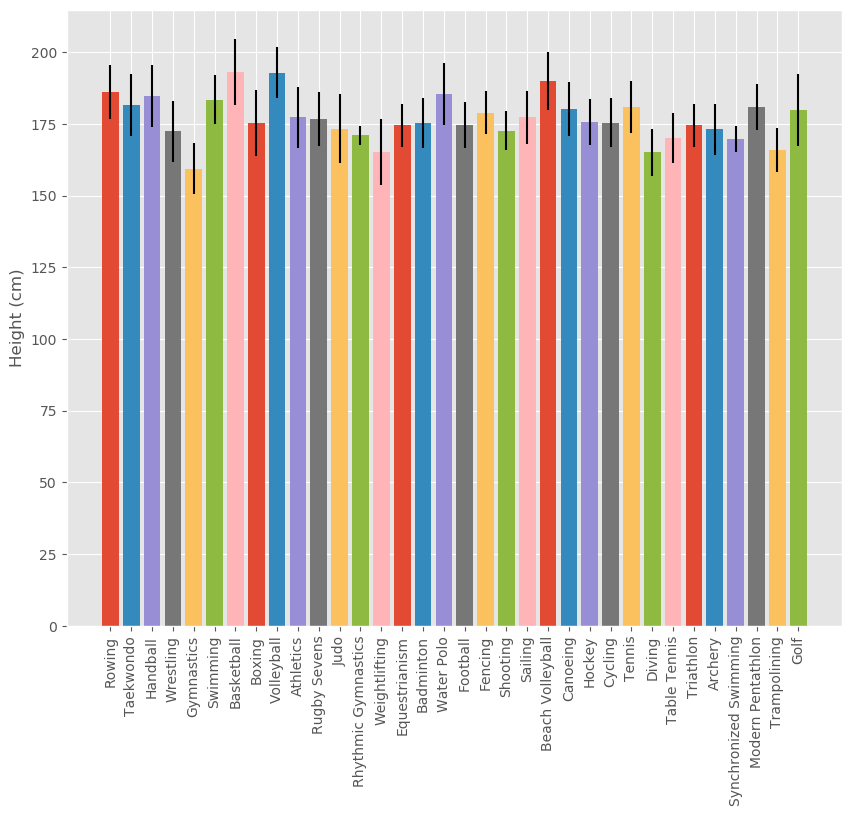

In [14]:
# automating chart creation
import matplotlib.pyplot as plt
import pandas as pd

summer_2016_medals = pd.read_csv('datasets/summer2016.csv')
sports = summer_2016_medals["Sport"].unique()

fig, ax = plt.subplots()
fig.set_size_inches((10,8))

for sport in sports:
    temp_df = summer_2016_medals[summer_2016_medals['Sport']==sport]
    ax.bar(sport, temp_df['Height'].mean(), yerr=temp_df['Height'].std())

ax.set_ylabel("Height (cm)")
ax.set_xticklabels(sports,rotation=90)
plt.show()

### Seaborn

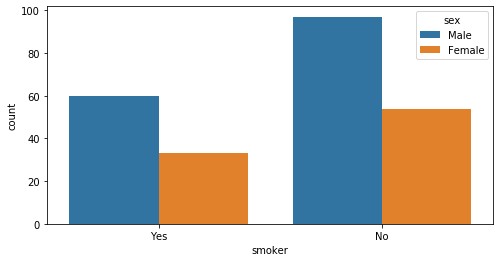

In [22]:
# pd dataframe to countplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

fig,ax = plt.subplots()     #can be ommited if fig/ax variables are not used
fig.set_size_inches((8,4))

sns.countplot(x="smoker",               
              data=tips,               
              hue="sex")

plt.show()


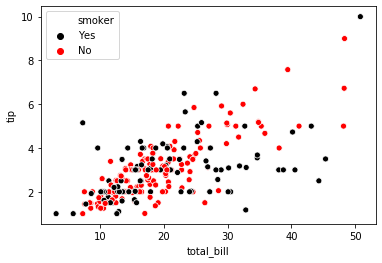

In [2]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
hue_colors = {"Yes": "black", "No": "red"} # hue dictionary

sns.scatterplot(x="total_bill",                 
                y="tip",    
                data=tips,
                hue="smoker",
                hue_order=["Yes", "No"], # hue order, optional
                palette=hue_colors)      # setting hue palette

plt.show()

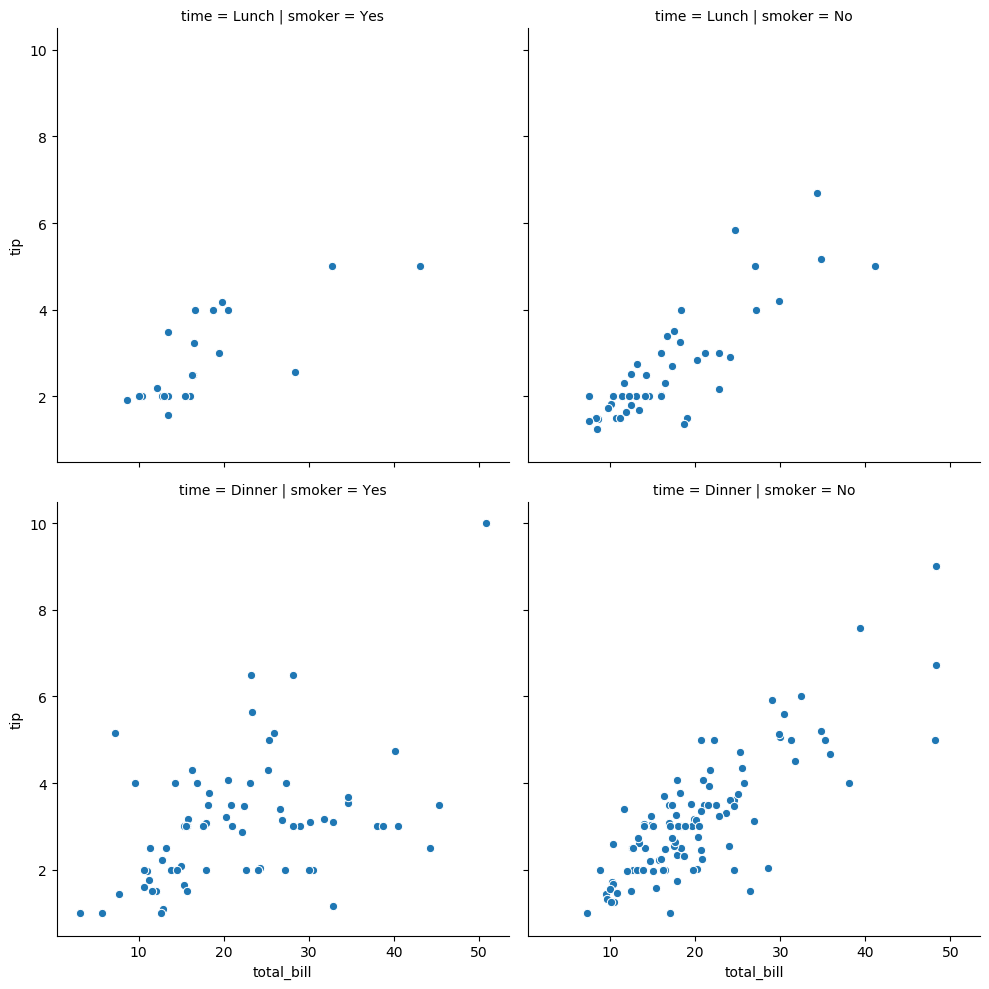

In [40]:
# relational plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x="total_bill",             
            y="tip",             
            data=tips,            
            kind="scatter",
            col='smoker', # column used to create comparison, side by side
            row='time') # column used to create comparison, in rows

plt.show()

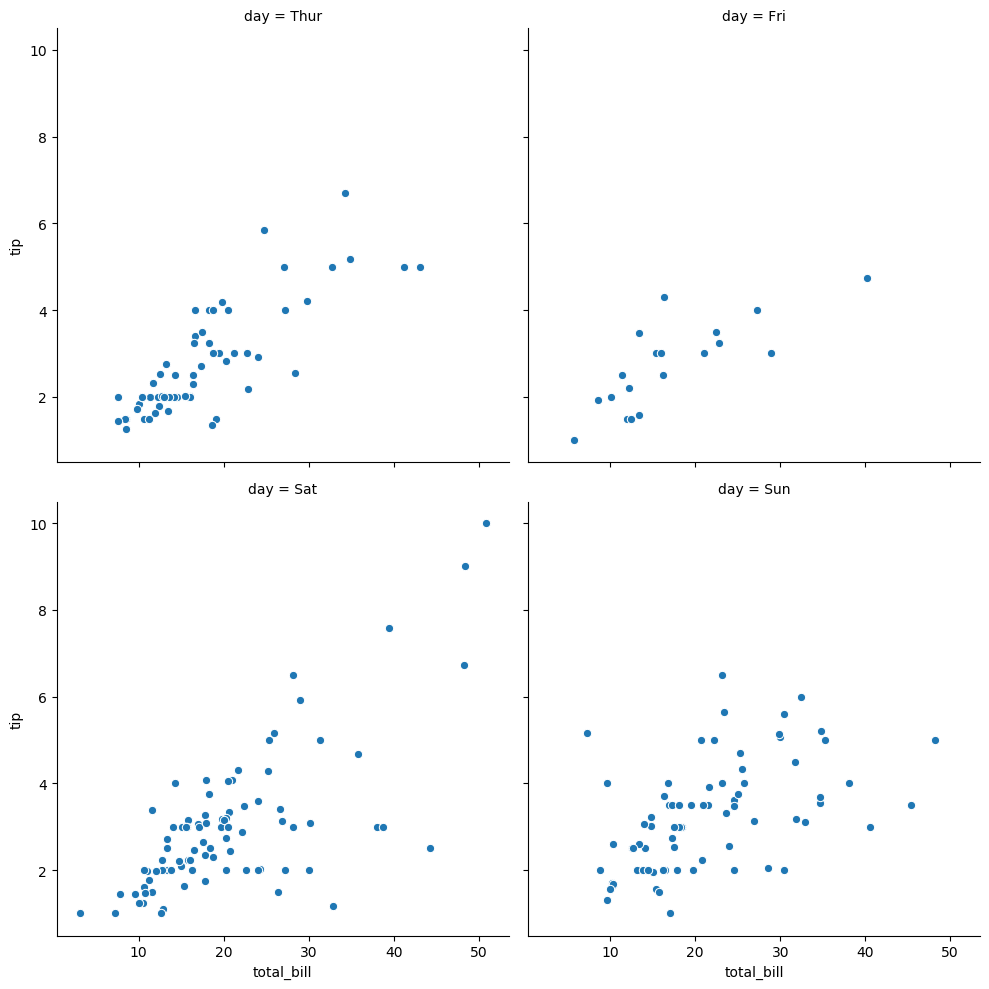

In [42]:
# relational plot - subgroups
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x="total_bill",             
            y="tip",             
            data=tips,            
            kind="scatter",
            col='day', 
            col_wrap=2,                           # how many subplots in a row
            col_order=["Thur","Fri","Sat","Sun"]) # order for subplots

plt.show()

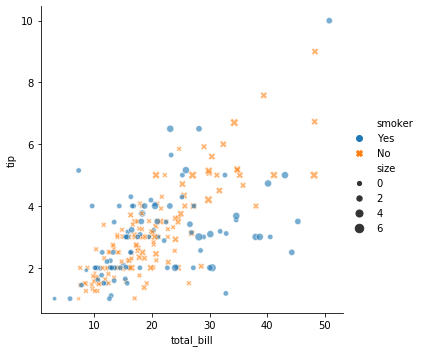

In [3]:
# sns customization
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="total_bill",             
            y="tip",             
            data=tips,             
            kind="scatter",
            size='size',    # size based on column
            hue="smoker",   # hue based on column          
            style="smoker", # point style based on column
            alpha=0.6) 

plt.show()

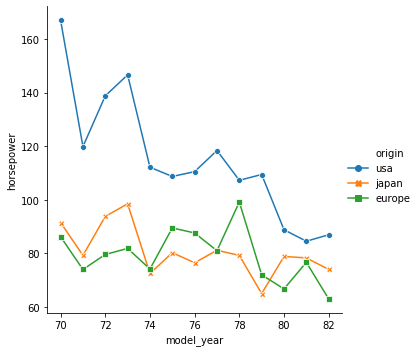

In [4]:
# lineplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mpg = pd.read_csv('datasets/mpg.csv')

# Add markers and make each line have the same style
sns.relplot(x="model_year", 
            y="horsepower", 
            data=mpg, 
            kind="line",
            ci=None,          # disable confidence intervals (can be 'sd', 95% bby def)
            style="origin",
            hue="origin",
            markers=True,     # add markers for data points
            dashes=False)     # keep solid lines for all series

plt.show()

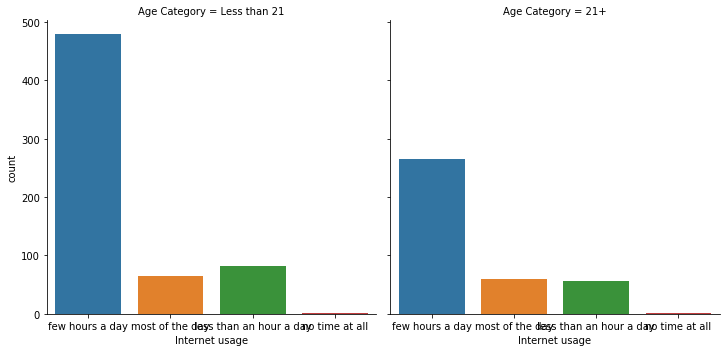

In [16]:
# categorical plots - countplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

survey_data = pd.read_csv('datasets/young-people-survey-responses.csv')
survey_data['Age Category'] = survey_data['Age'].apply(lambda x: '21+' if x>=21 else 'Less than 21')

sns.catplot(data=survey_data, 
            kind='count', 
            x="Internet usage",
            col="Age Category")

plt.show()

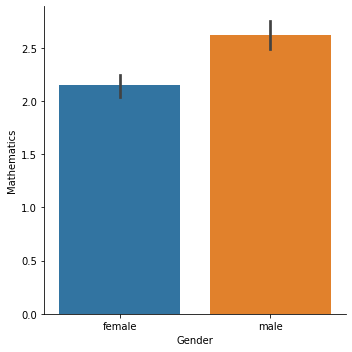

In [20]:
# categorical plots - barplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=survey_data, 
            kind='bar', 
            x='Gender', 
            y="Mathematics")

plt.show()

In [ ]:
# categorical plots - customizing plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# dataset??

category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order,
            ci=None)

plt.show()

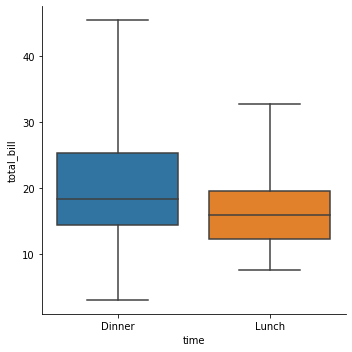

In [31]:
# categorical plots - boxplots
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="time",                 
                y="total_bill",                
                data=tips,                 
                kind="box",
                order=["Dinner", "Lunch"],
                sym="", #remove outliers
                whis=2.0) # by def whis = 1.5 * interquantile range (Q3-Q1, middle 50%)
#                 whis=[0, 100] - show min/max

plt.show()

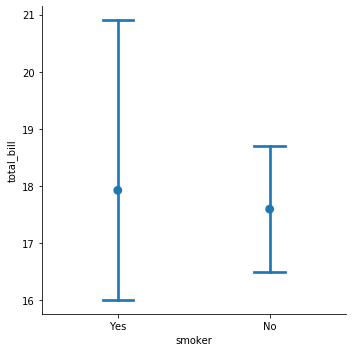

In [49]:
# point plots
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

sns.catplot(x="smoker",             
            y="total_bill",             
            data=tips,             
            kind="point",
            join=False, # disconnect points
            estimator=median, # replace point by median (avg by def)
            capsize=0.2 # ci size (ci=None disables ci)
            ) 

plt.show()

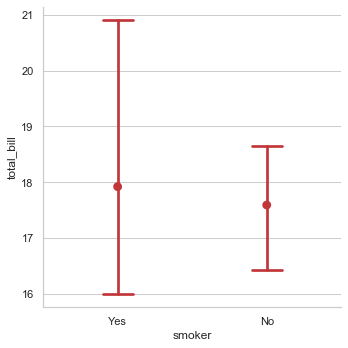

In [13]:
# customizing plots
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

sns.set_style('whitegrid') # setting default plot style, def "white"
# "white","dark","whitegrid","darkgrid","ticks"

sns.set_palette('RdBu') # color of main elements
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

sns.set_context('notebook') #changes the scale of the plot elements and labels
# "paper","notebook","talk","poster"

sns.catplot(x="smoker",             
            y="total_bill",             
            data=tips,
            kind="point",
            join=False,
            estimator=median, 
            capsize=0.2
            ) 

plt.show()

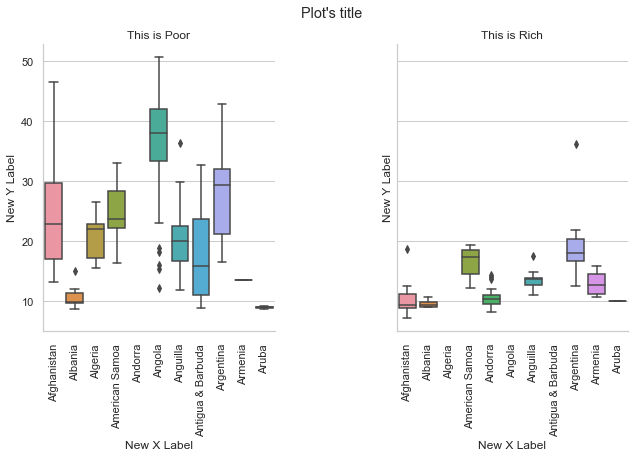

In [65]:
# FacetGrid - relplot(), catplot()
# AxesSubplot - scatterplot(), countplot()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

gdp_data=pd.read_csv('datasets/countries-of-the-world.csv')

gdp_data['Birthrate'] = gdp_data['Birthrate'].replace({'\,':'.'}, regex=True).apply(lambda x: float(x))
gdp_data['Group'] = gdp_data['GDP ($ per capita)'].apply(lambda x: 'Rich' if x >12000 else 'Poor')

g = sns.catplot(x="Region",                 
                y="Birthrate",                 
                data=gdp_data,                 
                kind="box",
                col='Group')

g.fig.suptitle("Plot's title", #adding title
              y=1.03)  # changing the hight

g.set_titles("This is {col_name}") # adding title for subplot based on col argument
g.set(xlabel="New X Label",       
      ylabel="New Y Label") # adding labels for subplots

g.set_xticklabels(gdp_data['Country'], rotation=90)
# plt.xticks(rotation=90)

plt.show()